<a href="https://colab.research.google.com/github/HaiNLH/Recommendation_system/blob/main/EDA_MVL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)

In [2]:
df0 = pd.read_csv("/content/drive/MyDrive/ml-latest-small/movies.csv")
df1 = pd.read_csv("/content/drive/MyDrive/ml-latest-small/ratings.csv")
df0.head(5)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df1.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movie_rating = df1.groupby('movieId')['rating'].mean().reset_index()
movie_rating.columns = ['movieId', 'movie_rating']
movie_rating.head(5)

,movieId,movie_rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429


In [5]:
vote_count = df1.groupby('movieId')['rating'].count().reset_index()
vote_count.columns = ['movieId', 'vote']
vote_count.head(5)

,movieId,vote
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49


In [6]:
df = pd.merge(df0,movie_rating, on = 'movieId' ).merge(vote_count, on = 'movieId')
df.head(10)

,movieId,title,genres,movie_rating,vote
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49
5,6,Heat (1995),Action|Crime|Thriller,3.946078,102
6,7,Sabrina (1995),Comedy|Romance,3.185185,54
7,8,Tom and Huck (1995),Adventure|Children,2.875000,8
8,9,Sudden Death (1995),Action,3.125000,16
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,132


In [7]:
df.tail(10)

,movieId,title,genres,movie_rating,vote
9714,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,3.5,1
9715,193567,anohana: The Flower We Saw That Day - The Movi...,Animation|Drama,3.0,1
9716,193571,Silver Spoon (2014),Comedy|Drama,4.0,1
9717,193573,Love Live! The School Idol Movie (2015),Animation,4.0,1
9718,193579,Jon Stewart Has Left the Building (2015),Documentary,3.5,1
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0,1
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.5,1
9721,193585,Flint (2017),Drama,3.5,1
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.5,1
9723,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0,1


In [8]:
df.dtypes

movieId           int64
title            object
genres           object
movie_rating    float64
vote              int64
dtype: object

In [9]:
df.count()

movieId         9724
title           9724
genres          9724
movie_rating    9724
vote            9724
dtype: int64

<Axes: xlabel='movie_rating'>

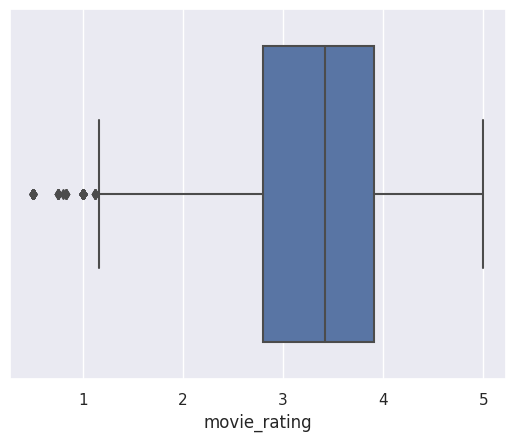

In [10]:
sns.boxplot(x = df['movie_rating'])

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9724 entries, 0 to 9723
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movieId       9724 non-null   int64  
 1   title         9724 non-null   object 
 2   genres        9724 non-null   object 
 3   movie_rating  9724 non-null   float64
 4   vote          9724 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 455.8+ KB


In [12]:
df.describe()

,movieId,movie_rating,vote
count,9724.000000,9724.000000,9724.000000
mean,42245.024373,3.262448,10.369807
std,52191.137320,0.869874,22.401005
min,1.000000,0.500000,1.000000
25%,3245.500000,2.800000,1.000000
50%,7300.000000,3.416667,3.000000
75%,76739.250000,3.911765,9.000000
max,193609.000000,5.000000,329.000000


In [13]:
genres_list = df['genres'].str.split('|', expand = True).stack().value_counts()
len(genres_list)
print(genres_list)
df.columns

Drama                 4349
Comedy                3753
Thriller              1889
Action                1828
Romance               1591
Adventure             1262
Crime                 1196
Sci-Fi                 980
Horror                 977
Fantasy                778
Children               664
Animation              610
Mystery                573
Documentary            438
War                    381
Musical                333
Western                167
IMAX                   158
Film-Noir               85
(no genres listed)      34
dtype: int64


Index(['movieId', 'title', 'genres', 'movie_rating', 'vote'], dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Thriller'),
  Text(3, 0, 'Action'),
  Text(4, 0, 'Romance'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Sci-Fi'),
  Text(8, 0, 'Horror'),
  Text(9, 0, 'Fantasy'),
  Text(10, 0, 'Children'),
  Text(11, 0, 'Animation'),
  Text(12, 0, 'Mystery'),
  Text(13, 0, 'Documentary'),
  Text(14, 0, 'War'),
  Text(15, 0, 'Musical'),
  Text(16, 0, 'Western'),
  Text(17, 0, 'IMAX'),
  Text(18, 0, 'Film-Noir'),
  Text(19, 0, '(no genres listed)')])

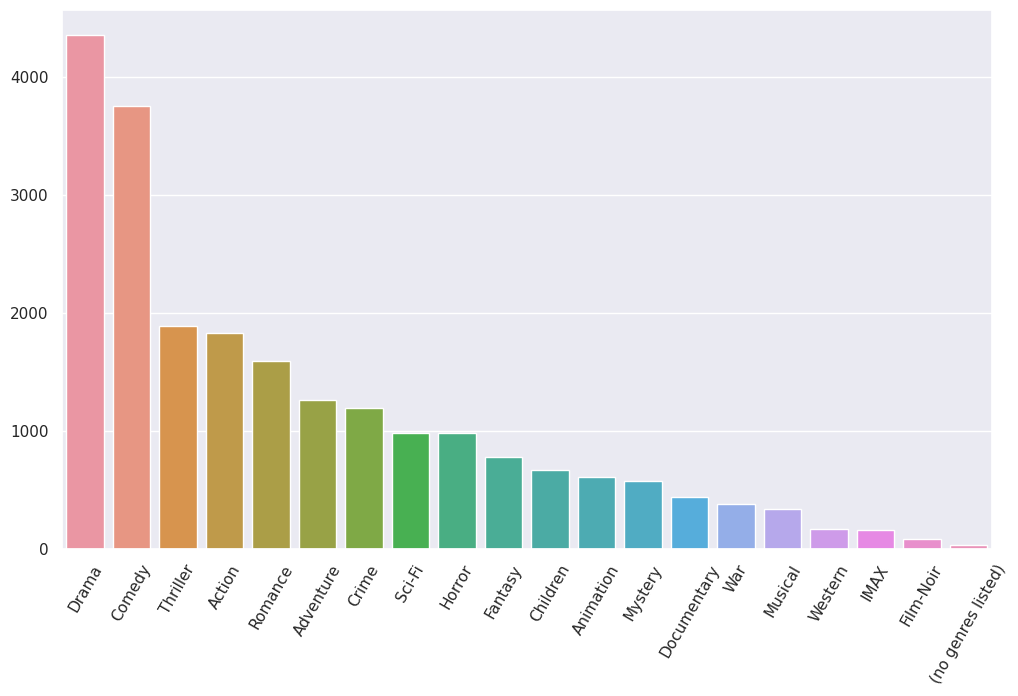

In [14]:
plt.figure(figsize = (12,7))

sns.barplot(x = genres_list.index, y = genres_list.values)
plt.xticks(rotation = 60)

In [15]:
import re
df['year'] = df['title'].str.extract(r'\((\d{4})\)')
df.head(10)

,movieId,title,genres,movie_rating,vote,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49,1995
5,6,Heat (1995),Action|Crime|Thriller,3.946078,102,1995
6,7,Sabrina (1995),Comedy|Romance,3.185185,54,1995
7,8,Tom and Huck (1995),Adventure|Children,2.875000,8,1995
8,9,Sudden Death (1995),Action,3.125000,16,1995
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,132,1995


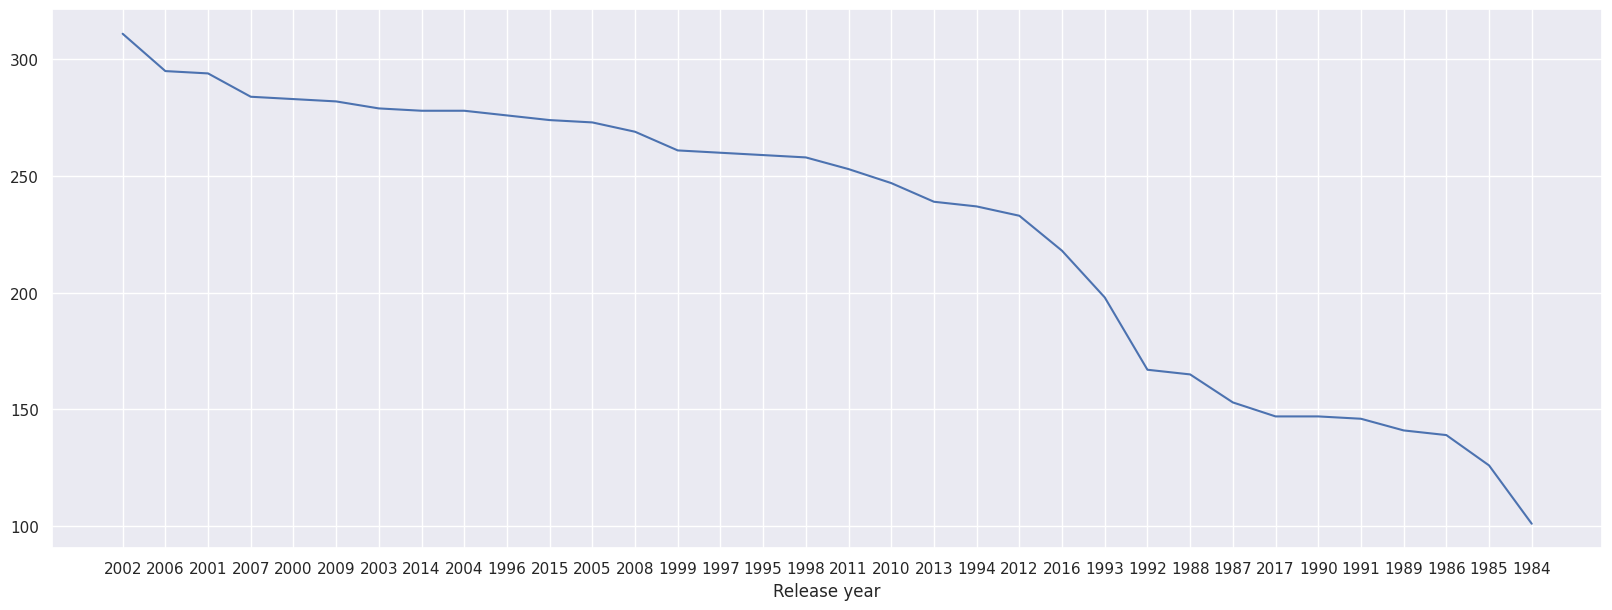

In [16]:
plt.figure(figsize=(20,7))
yearly_count = df.groupby('year').size().sort_values(ascending = False)
yearly_count = yearly_count[yearly_count >=100]
sns.lineplot(x=yearly_count.index, y=yearly_count.values);

plt.xlabel("Release year");